# Pretrained Segmentation Model (SAM)

In [2]:
import keras_hub

model = keras_hub.models.ImageSegmenter.from_preset("sam_huge_sa1b")

/Users/yuhaochen/Developer/LearnDeepLearning/ImageSegmentation/.pixi/envs/default/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model.count_params()

641090864

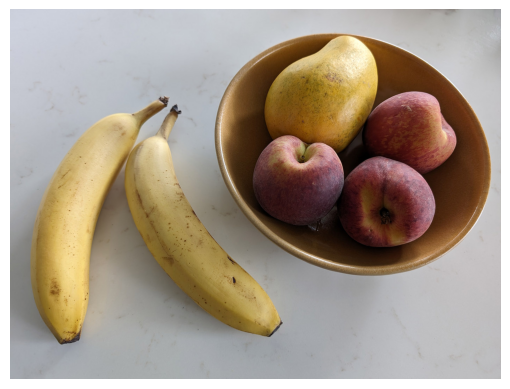

In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt

path = keras.utils.get_file(
    origin="https://s3.amazonaws.com/keras.io/img/book/fruits.jpg"
)
pil_image = keras.utils.load_img(path)
image_array = keras.utils.img_to_array(pil_image)

plt.imshow(image_array.astype("uint8"))
plt.axis("off")
plt.show()

In [5]:
from keras import ops

image_size = (1024, 1024)

def resize_and_pad(x):
    return ops.image.resize(x, image_size, pad_to_aspect_ratio=True)

image = resize_and_pad(image_array)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras import ops

def show_image(image, ax):
    ax.imshow(ops.convert_to_numpy(image).astype("uint8"))

def show_mask(mask, ax):
    color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w, _ = mask.shape
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(points, ax):
    x, y = points[:, 0], points[:, 1]
    ax.scatter(x, y, c="green", marker="*", s=375, ec="white", lw=1.25)

def show_box(box, ax):
    box = box.reshape(-1)
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, ec="red", fc="none", lw=2))

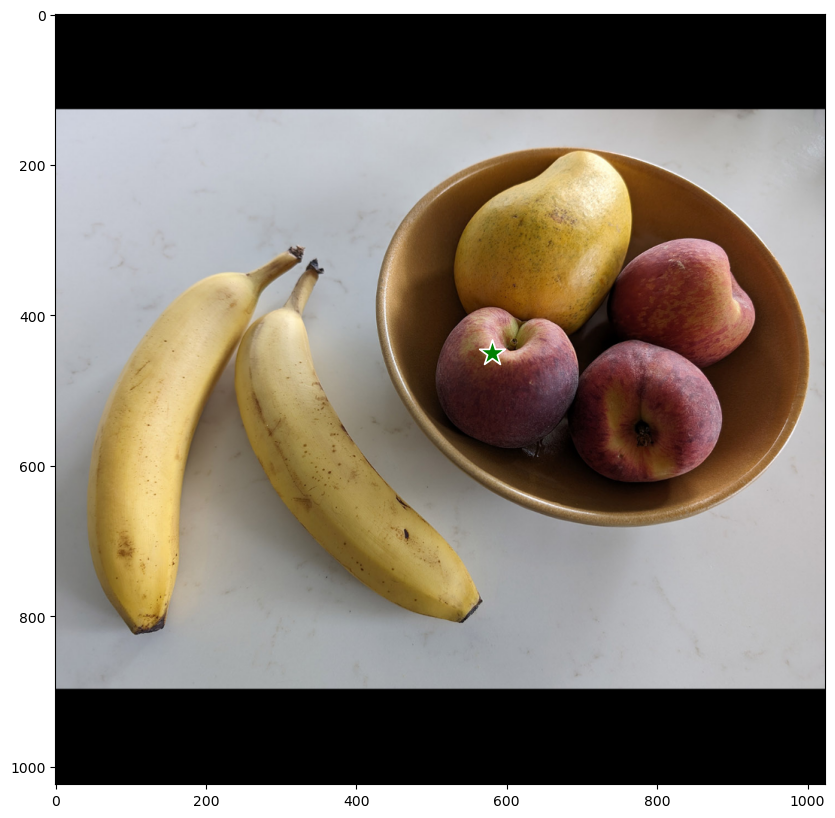

In [7]:
input_point = np.array([[580, 450]])
input_label = np.array([1])

plt.figure(figsize=(10, 10))
show_image(image, plt.gca())
show_points(input_point, plt.gca())
plt.show()

In [8]:
outputs = model.predict(
    {
        "images": ops.expand_dims(image, axis=0),
        "points": ops.expand_dims(input_point, axis=0),
        "labels": ops.expand_dims(input_label, axis=0),
    }
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step


In [9]:
outputs["masks"].shape

(1, 4, 256, 256)

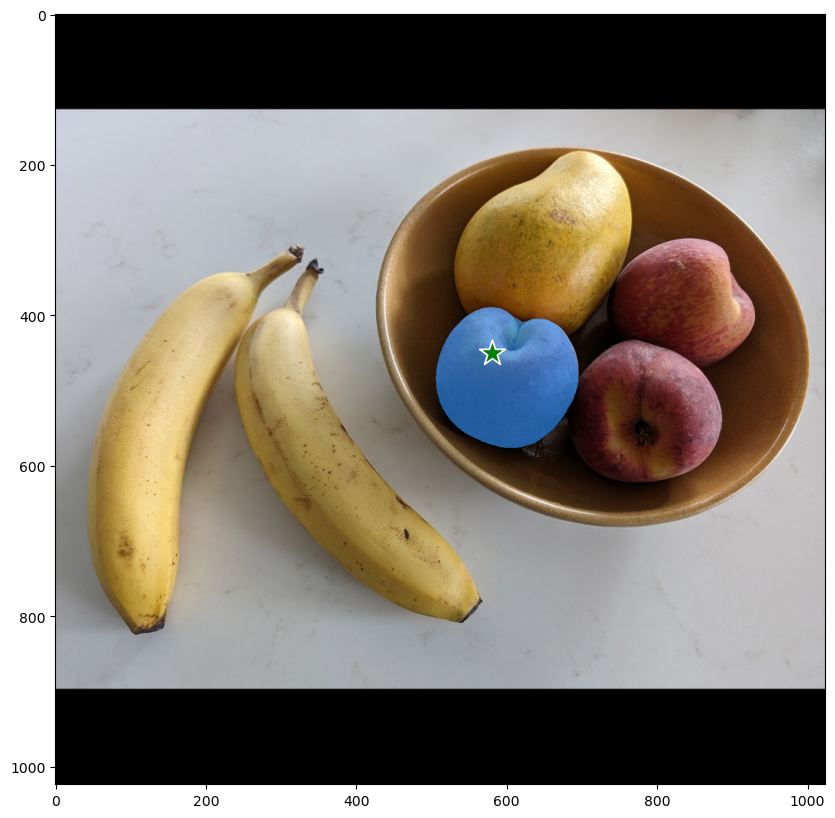

In [10]:
def get_mask(sam_outputs, index=0):
    mask = sam_outputs["masks"][0][index]
    mask = np.expand_dims(mask, axis=-1)
    mask = resize_and_pad(mask)
    return ops.convert_to_numpy(mask) > 0.0

mask = get_mask(outputs, index=0)

plt.figure(figsize=(10, 10))
show_image(image, plt.gca())
show_mask(mask, plt.gca())
show_points(input_point, plt.gca())
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step


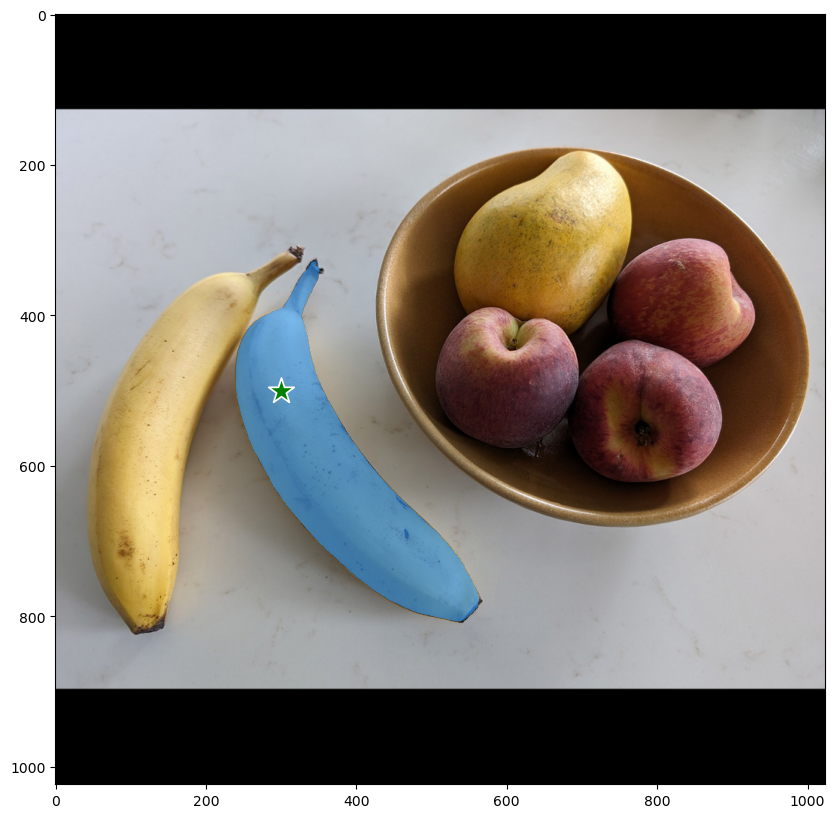

In [15]:
input_point = np.array([[300, 500]])
input_label = np.array([1])

outputs = model.predict({
    "images": ops.expand_dims(image, axis=0),
    "points": ops.expand_dims(input_point, axis=0),
    "labels": ops.expand_dims(input_label, axis=0),
})

mask = get_mask(outputs, index=0)

plt.figure(figsize=(10, 10))
show_image(image, plt.gca())
show_mask(mask, plt.gca())
show_points(input_point, plt.gca())
plt.show()

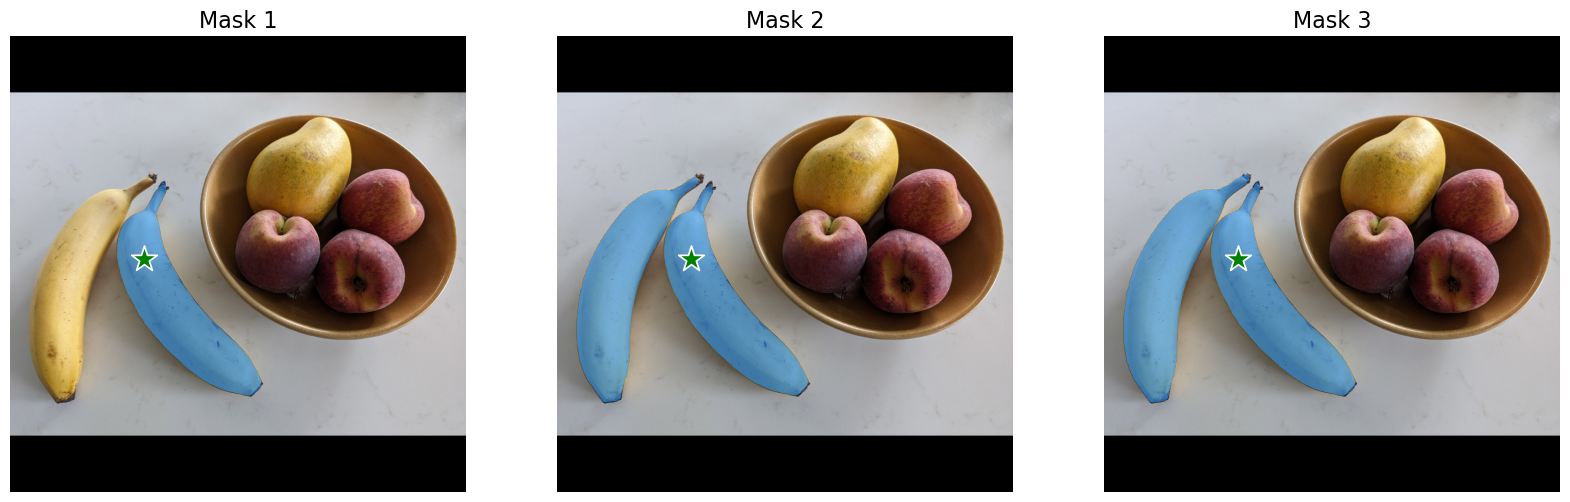

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 60))
masks = outputs["masks"][0][1:]
for i, mask in enumerate(masks):
    show_image(image, axes[i])
    show_points(input_point, axes[i])
    mask = get_mask(outputs, index=i + 1)
    show_mask(mask, axes[i])
    axes[i].set_title(f"Mask {i + 1}", fontsize=16)
    axes[i].axis("off")
plt.show()

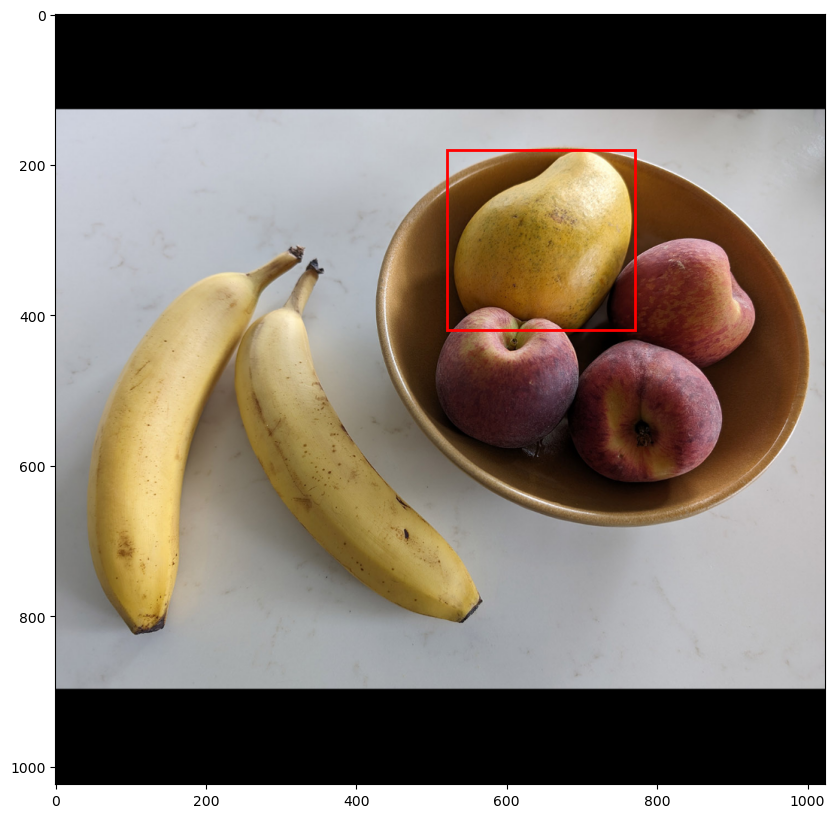

In [21]:
input_box = np.array([[520, 180], [770, 420]])

plt.figure(figsize=(10, 10))
show_image(image, plt.gca())
show_box(input_box, plt.gca())
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step


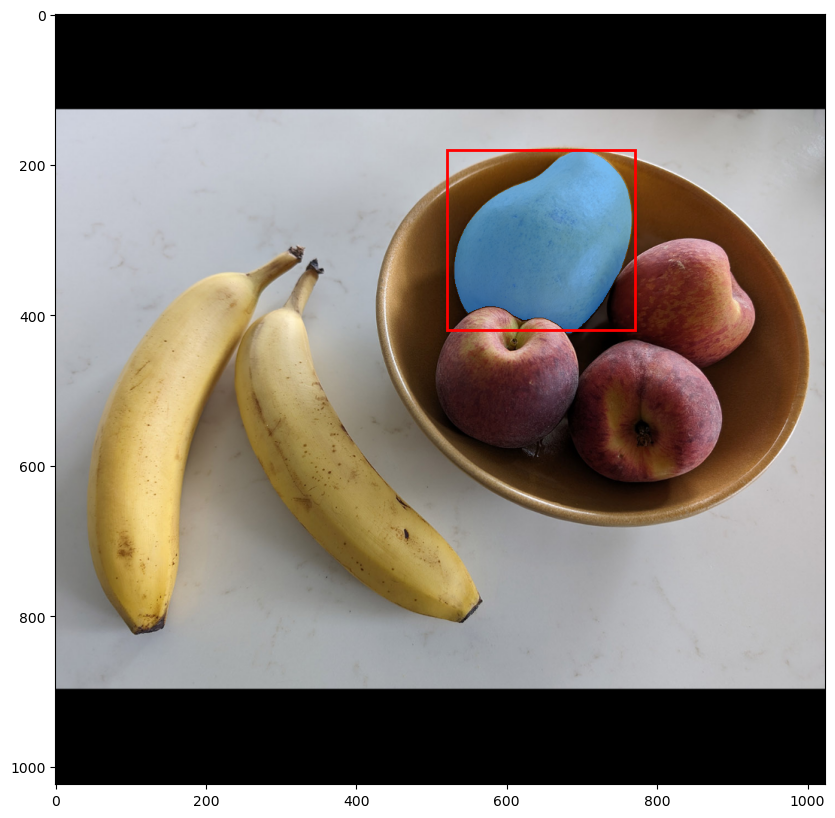

In [22]:
outputs = model.predict(
    {
        "images": ops.expand_dims(image, axis=0),
        "boxes": ops.expand_dims(input_box, axis=(0, 1)),
    }
)
mask = get_mask(outputs, index=0)
plt.figure(figsize=(10, 10))
show_image(image, plt.gca())
show_mask(mask, plt.gca())
show_box(input_box, plt.gca())
plt.show()